In [95]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt


**Data Preparation**

In [96]:
dataset, dataset_info = tfds.load("mnist", split=["test", "train"], shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /Users/cheesemac/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [97]:
dataset_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/cheesemac/tensorflow_datasets/mnist/3.0.1.incompleteHWZHHL',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={201

In [98]:
print("Test set size: " + str(len(dataset[0])))
print("Train set size: " + str(len(dataset[1])))

Test set size: 10000
Train set size: 60000


In [99]:
list(dataset[0].take(1))

2024-01-30 23:23:29.684709: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


[(<tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
  array([[[  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0]],
  
         [[  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
        

In [100]:
VAL_TEST_SIZE = len(dataset[0])
test_dataset = dataset[0]
val_dataset = dataset[1].take(VAL_TEST_SIZE)
train_dataset = dataset[1].skip(VAL_TEST_SIZE)
print(len(test_dataset))
print(len(val_dataset))
print(len(train_dataset))

10000
10000
50000


In [101]:
list(test_dataset.take(1))

2024-01-30 23:23:29.740254: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


[(<tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
  array([[[  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0]],
  
         [[  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
          [  0],
        

**Data Visualization**

2024-01-30 23:23:29.806938: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


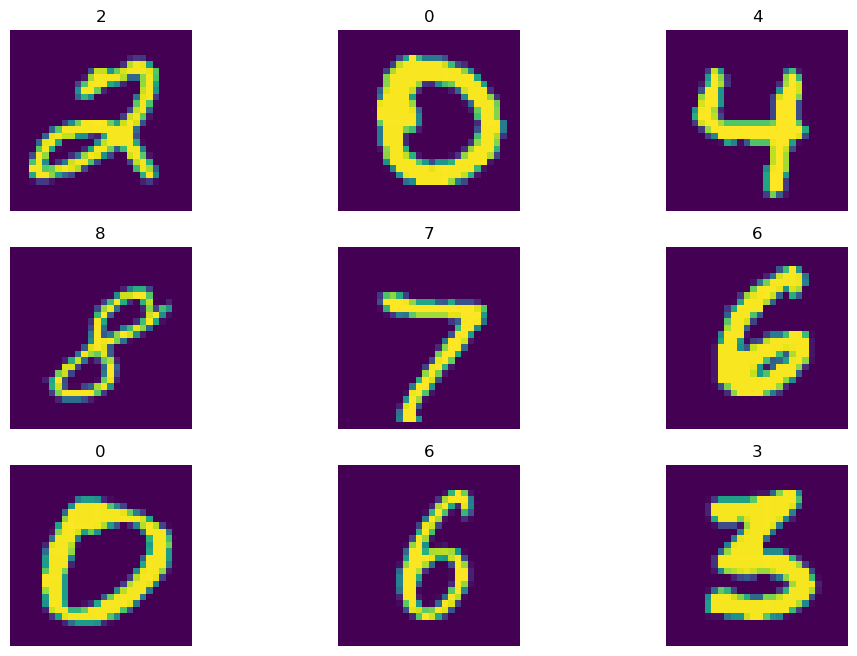

In [102]:
plt.figure(figsize=(12,8))
for i, (img, label) in enumerate(test_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(label.numpy())
    plt.axis("off")

plt.show();

**Data Processing**

In [103]:
def normalize_image(img, label):
    return img / 255, label

In [104]:
train_dataset = train_dataset.map(normalize_image)
val_dataset = val_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

In [106]:
BUFFER_SIZE = 300
BATCH_SIZE = 250
train_dataset = train_dataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)